# Using napari for visualisation

---
*Introduction to Image Analysis Workshop*

*Stefania Marcotti (stefania.marcotti@kcl.ac.uk)*

*Intro to using napari as a visualisation tool from Jupyter notebooks*

*CC-BY-SA-4.0 license: creativecommons.org/licenses/by-sa/4.0/*

---

In this notebook we are going to explore how using [`napari`](https://napari.org/stable/index.html) as a visualisation tool allows us for more flexibility than the more classical `matplotlib` approach. We are also going to use [`aicsimageio`](https://allencellmodeling.github.io/aicsimageio/index.html#) to import images so that the metadata is read properly.

You can find the full `napari` API documentation at [this link](https://napari.org/stable/api/).

### Import libraries

In [23]:
import numpy as np

from skimage import io
from skimage import filters
from skimage import measure

import matplotlib.pyplot as plt

import napari

from aicsimageio import AICSImage

### Import data

In [2]:
# read .tif file
im_read = io.imread('../../Data/idr0028/003003-10.tif')

# rearrange channels
im_all = np.transpose(im_read, (2, 0, 1))

### Visualise the data using `matplotlib`

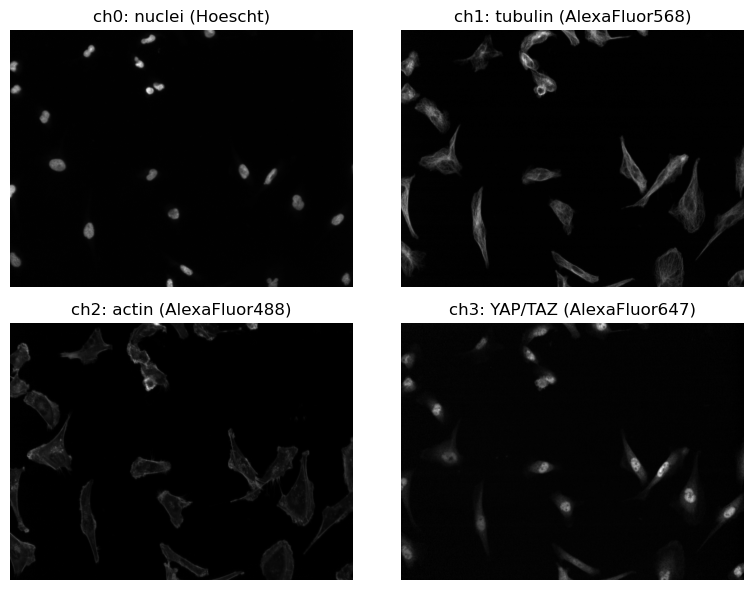

In [3]:
# display all channels 
fig, axs = plt.subplots(2, 2, figsize=(8,6))

axs[0, 0].imshow(im_all[0,], cmap='gray')
axs[0, 0].set_title('ch0: nuclei (Hoescht)')
axs[0, 0].axis('off')

axs[0, 1].imshow(im_all[1,], cmap='gray')
axs[0, 1].set_title('ch1: tubulin (AlexaFluor568)')
axs[0, 1].axis('off')

axs[1, 0].imshow(im_all[2,], cmap='gray')
axs[1, 0].set_title('ch2: actin (AlexaFluor488)')
axs[1, 0].axis('off')

axs[1, 1].imshow(im_all[3,], cmap='gray')
axs[1, 1].set_title('ch3: YAP/TAZ (AlexaFluor647)')
axs[1, 1].axis('off')

plt.tight_layout()

### Visualise the data using `napari`

You might want to check the import options at [this `napari` API documentation page](https://napari.org/stable/api/napari.html#napari.view_image)

In [48]:
viewer = napari.Viewer()
viewer.add_image(im_all[0,], name='nuclei', colormap='cyan')
viewer.add_image(im_all[1,], name='tubulin', colormap='magenta')
viewer.add_image(im_all[2,], name='actin', colormap='green')
viewer.add_image(im_all[3,], name='YAP/TAZ', colormap='yellow')

<Image layer 'YAP/TAZ' at 0x2c8aac550>

### Performing the nuclear segmentation and visualising the results in `napari`

In [5]:
# open image (only ch0)
im = im_all[0,]
# filter with Gaussian
im_gauss = filters.gaussian(im, sigma=5)

# threshold with Otsu
thresh = filters.threshold_otsu(im_gauss)
im_thresh = im_gauss >= thresh

# label mask
labels = measure.label(im_thresh)


In [6]:
viewer.add_image(im_gauss, name='nuclei_gaussian_filter')
viewer.add_image(im_thresh, name='nuclei_binary')
viewer.add_labels(labels, name='nuclei_labels')

<Labels layer 'nuclei_labels' at 0x2b9206b80>

### Import 3D data with `aicsimageio`

`aicsimageio` is a library for image reading, metadata conversion, and image writing for microscopy images. You can find the full API at [this link](https://allencellmodeling.github.io/aicsimageio/).

In [26]:
# read .tif file with Bioformats importer `aicsimageio`
im1_read = AICSImage('../../Data/others/3D_Image.ome.tiff')

In [31]:
# check the dimensions of the object
print('Object dimensions:', im1_read.shape)

Object dimensions: (1, 2, 76, 512, 512)


In [32]:
# check the order of the given dimensions
print('Dimensions order:', im1_read.dims.order)

Dimensions order: TCZYX


In [44]:
# check the spatial resolution
print(im1_read.physical_pixel_sizes)
scale_um = [im1_read.physical_pixel_sizes.Z, im1_read.physical_pixel_sizes.Y, im1_read.physical_pixel_sizes.X]

PhysicalPixelSizes(Z=0.8892, Y=0.19240046920821113, X=0.19240046920821113)


### Visualise using `napari`

In [46]:
viewer = napari.Viewer()
viewer.add_image(im1_read.data[0,0,], name='nuclei', colormap='green', scale = scale_um)
viewer.add_image(im1_read.data[0,1,], name='membrane', colormap='magenta', scale = scale_um)

<Image layer 'membrane' at 0x2c5c03040>

### Further reading
If you're interested in knowing more about integrating napari and Jupyter, you can take a look at the material [here](https://biapol.github.io/HIP_Introduction_to_Napari_and_image_processing_with_Python_2022/03_Introduction_Jupyter_with_napari/readme.html). Good luck with your image analysis adventures!